In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_plots

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y


def setup_shi(yn,xn,return_model=False,num_params=4):
    x1n,x2n = xn[:,0].reshape(xn.shape[0],1),xn[:,1:num_params]
    # model 1 grad, etc.
    model1 = sm.OLS(yn,sm.add_constant(x1n))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    
    model1_deriv = OLS_loglike(yn,sm.add_constant(x1n))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    grad1 =  model1_deriv.score_obs(model1_fit.params)    
    hess1 = model1_deriv.hessian(model1_fit.params)
    
    #model 2 grad, etc.
    model2 = sm.OLS(yn,sm.add_constant(x2n))
    model2_fit = model2.fit(disp=False)
    params2 = (model2_fit.params)
    
    model2_deriv = OLS_loglike(yn,sm.add_constant(x2n))
    ll2 = model2_deriv.loglikeobs(model2_fit.params)
    grad2 =  model2_deriv.score_obs(model2_fit.params)    
    hess2 = model2_deriv.hessian(model2_fit.params)
    
    if return_model:
        return ll1,grad1,hess1,params1,model1,ll2,grad2,hess2,params2,model2
    return ll1,grad1,hess1,params1,ll2,grad2,hess2,params2

def gen_data(nobs=1000, a=0.0, num_params=1):
    x = np.random.normal(scale=1., size=(nobs,1+num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x[:,0] + a/np.sqrt(num_params)*x[:,1:num_params+1].sum(axis=1) + e
    return y,x,nobs

yn,xn,nobs = gen_data()
ll1,grad1,hess1,params1,ll2,grad2,hess2,params2 = setup_shi(yn,xn,return_model=False,num_params=15)
print(grad1.shape,hess1.shape)

(1000, 2) (2, 2)


# a = .25

../figs/a25_k1.png


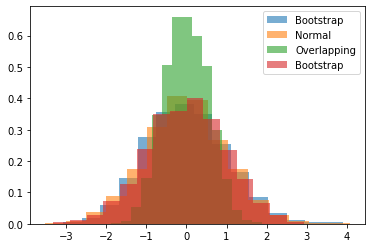

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.001 & 1.026 & 0.232 & 0.110 & 0.231 & 3.253 \\
Bootstrap & 0.001 & 0.952 & -0.078 & -0.104 & -0.078 & 2.606 \\
Normal & -0.013 & 0.978 & 0.033 & 0.161 & 0.033 & 3.025 \\
Overlapping & -0.006 & 0.297 & 0.010 & -0.027 & 0.010 & 0.237 \\
\bottomrule
\end{tabular}
\end{center}


In [17]:
a=.25
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k9.png


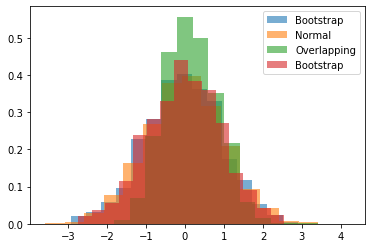

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.046 & 0.945 & -0.081 & -0.074 & -0.081 & 2.595 \\
Bootstrap & -0.027 & 0.893 & -0.059 & -0.154 & -0.059 & 2.231 \\
Normal & 0.011 & 0.986 & -0.006 & -0.007 & -0.006 & 2.907 \\
Overlapping & 0.159 & 0.462 & 0.088 & 0.037 & 0.088 & 0.676 \\
\bottomrule
\end{tabular}
\end{center}


In [21]:
a=.25
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k4.png


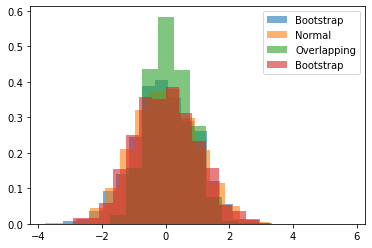

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.017 & 0.957 & -0.079 & 0.002 & -0.079 & 2.737 \\
Bootstrap & 0.002 & 0.990 & 0.091 & -0.149 & 0.091 & 2.781 \\
Normal & -0.005 & 0.995 & 0.054 & -0.202 & 0.054 & 2.767 \\
Overlapping & 0.119 & 0.445 & 0.092 & 0.160 & 0.092 & 0.753 \\
\bottomrule
\end{tabular}
\end{center}


In [22]:
a=.25
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a25_k191.png


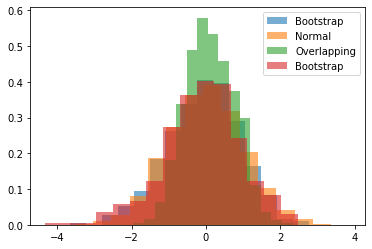

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & -0.080 & 0.952 & -0.195 & 0.008 & -0.194 & 2.718 \\
Bootstrap & -0.100 & 1.051 & -0.421 & 0.674 & -0.418 & 3.950 \\
Normal & -0.008 & 1.021 & -0.016 & -0.068 & -0.016 & 3.057 \\
Overlapping & 0.121 & 0.429 & 0.028 & -0.066 & 0.028 & 0.485 \\
\bottomrule
\end{tabular}
\end{center}


In [28]:
a= .25
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s1.png'%(int(a*100),k))

# a = 0

../figs/a0_k1.png


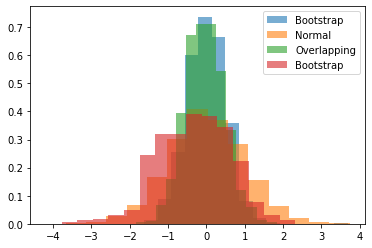

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.006 & 0.263 & 0.049 & 0.167 & 0.049 & 0.372 \\
Bootstrap & -0.313 & 0.872 & -0.186 & 0.068 & -0.185 & 2.337 \\
Normal & 0.005 & 0.986 & -0.005 & 0.172 & -0.005 & 3.088 \\
Overlapping & -0.040 & 0.261 & 0.014 & 0.001 & 0.014 & 0.204 \\
\bottomrule
\end{tabular}
\end{center}


In [7]:
a = 0
k = 1
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k9.png


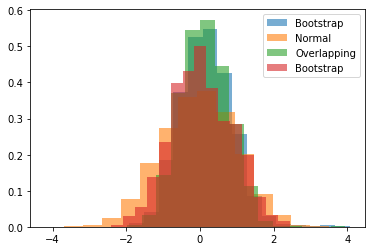

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.179 & 0.511 & 0.192 & 0.386 & 0.192 & 1.165 \\
Bootstrap & 0.054 & 0.698 & 0.049 & -0.178 & 0.049 & 1.279 \\
Normal & -0.023 & 1.008 & -0.061 & -0.112 & -0.061 & 2.936 \\
Overlapping & 0.136 & 0.419 & 0.047 & 0.037 & 0.047 & 0.562 \\
\bottomrule
\end{tabular}
\end{center}


In [8]:
a = 0
k = 9
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k4.png


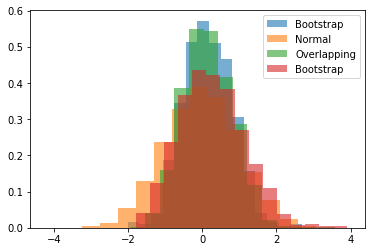

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.154 & 0.440 & 0.039 & 0.046 & 0.039 & 0.623 \\
Bootstrap & 0.266 & 0.768 & 0.285 & 0.215 & 0.284 & 1.977 \\
Normal & -0.015 & 0.995 & -0.017 & -0.126 & -0.017 & 2.844 \\
Overlapping & 0.155 & 0.446 & 0.079 & 0.043 & 0.079 & 0.638 \\
\bottomrule
\end{tabular}
\end{center}


In [9]:
a = 0
k = 4
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)
vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))

../figs/a0_k19.png


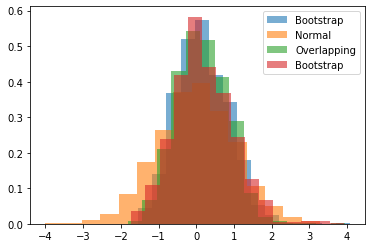

\begin{center}
\begin{tabular}{ccccccc}
\toprule
\textbf{Test} & \textbf{Mean} & \textbf{Var} & \textbf{K-Stat 3} & \textbf{K-Stat 4} & \textbf{Skew} & \textbf{Kurtosis} \\ \midrule
True & 0.167 & 0.491 & 0.141 & 0.175 & 0.140 & 0.895 \\
Bootstrap & 0.191 & 0.613 & 0.251 & 0.362 & 0.250 & 1.482 \\
Normal & -0.003 & 1.024 & -0.014 & 0.042 & -0.014 & 3.186 \\
Overlapping & 0.155 & 0.460 & 0.081 & 0.073 & 0.081 & 0.708 \\
\bottomrule
\end{tabular}
\end{center}


In [10]:
a = 0
k = 19
gen_data_ex = lambda : gen_data(nobs=1000,a=a,num_params=k)

vuong_plots.plot_kstats_table(gen_data_ex,setup_shi,figtitle='../figs/a%s_k%s.png'%(int(a*100),k))